In [86]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt
from utils import get_test_table
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
X_train, X_test, y_train, y_test = get_test_table(scaled=True)
X_train = X_train.drop('date', axis=1)
X_test = X_test.drop('date', axis=1)

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['auto', 'svd', 'lsqr'],
    'max_iter': [1000, 5000, 8000],
    'tol': [1e-3, 1e-4]
}

ridge = Ridge()

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
print(f'Best Parameters: {best_parameters}')

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_clipped = np.clip(y_pred, a_min=0, a_max=None)

rmse = sqrt(mean_squared_error(y_test, y_pred_clipped))
print(f'RMSE of the best model: {rmse}')

Best Parameters: {'alpha': 0.01, 'max_iter': 1000, 'solver': 'auto', 'tol': 0.001}
RMSE of the best model: 0.05088432506212886


In [89]:
best_alpha = best_parameters['alpha']
best_solver = best_parameters['solver']
best_max_iter = best_parameters['max_iter']
best_tol = best_parameters['tol']

# The model with best params
ridge_best = Ridge(alpha=best_alpha, solver=best_solver, max_iter=best_max_iter, tol=best_tol)

ridge_best.fit(X_train, y_train)

Ridge(alpha=0.01, max_iter=1000, tol=0.001)

In [90]:
coefficients = ridge_best.coef_
feature_names = X_train.columns

# Pair the feature names with the coefficients
feature_importance = list(zip(feature_names, coefficients))

# Sort the features by the absolute value of their coefficients
sorted_feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Display the sorted feature importance
for feature, coef in sorted_feature_importance:
    print(f"Feature: {feature}, Coefficient: {abs(coef)}")

Feature: 2m_temp_mean, Coefficient: 0.9938207235821277
Feature: 2m_dp_temp_mean, Coefficient: 0.5787140874345316
Feature: 2m_temp_max, Coefficient: 0.436178324272981
Feature: 10m_wind_u, Coefficient: 0.21704889929807247
Feature: 2m_dp_temp_min, Coefficient: 0.19937460552607775
Feature: total_et, Coefficient: 0.17579693419360126
Feature: surf_net_solar_rad_mean, Coefficient: 0.15788071834415388
Feature: 2m_dp_temp_max, Coefficient: 0.14612486601717986
Feature: 2m_temp_min, Coefficient: 0.12266213696353978
Feature: surf_press, Coefficient: 0.09663115740347637
Feature: surf_net_therm_rad_max, Coefficient: 0.062403012027610505
Feature: swe, Coefficient: 0.05050413180474239
Feature: surf_net_therm_rad_mean, Coefficient: 0.04371346061123805
Feature: surf_net_solar_rad_max, Coefficient: 0.03729880927959206
Feature: fcst_alb, Coefficient: 0.029270069590839373
Feature: 10m_wind_v, Coefficient: 0.02678457283353708
Feature: lai_low_veg, Coefficient: 0.020222558854239726
Feature: lai_high_veg, Coe

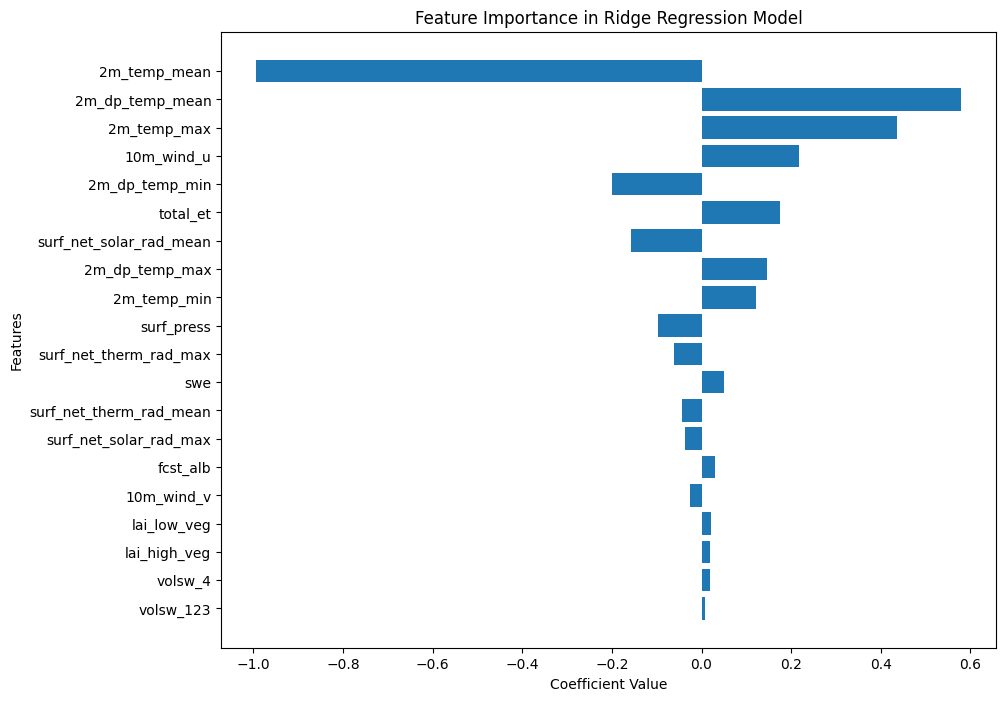

In [91]:
features, coefficients = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(features, coefficients)  # Horizontal bar plot
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Ridge Regression Model')
plt.gca().invert_yaxis()
plt.show()

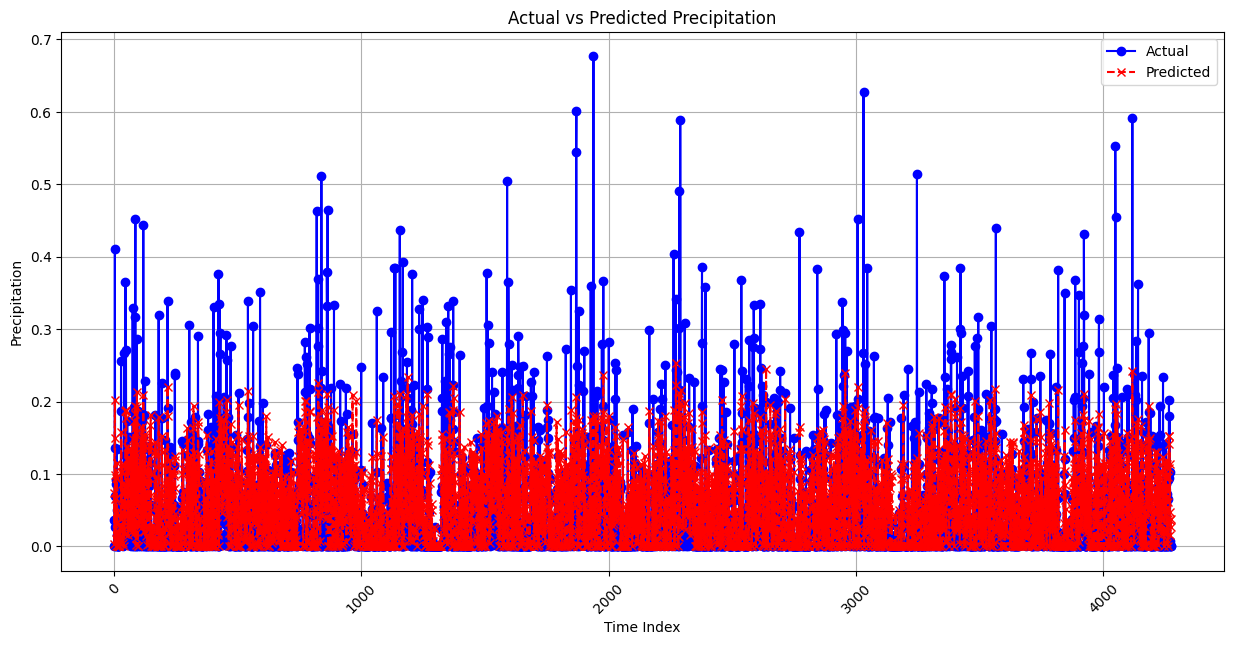

In [96]:

index = range(len(y_test))

plt.figure(figsize=(15, 7))
plt.plot(index, y_test, label='Actual', color='blue', marker='o')

plt.plot(index, y_pred_clipped, label='Predicted', color='red', linestyle='--', marker='x')

plt.title('Actual vs Predicted Precipitation')
plt.xlabel('Time Index')
plt.ylabel('Precipitation')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()